# This is an EDA exercise on a data set from Spotify. 

## The objective is to uncover insights about my activity on Spotify.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json('C:/Users/pclee/Downloads/my_spotify_data/MyData/StreamingHistory0.json')

In [3]:
df.head()

,endTime,artistName,trackName,msPlayed
0,2021-10-03 23:04,Vance Joy,Emmylou,127281
1,2021-10-05 00:30,Radio Headspace,Great Expectations,327872
2,2021-10-06 00:31,Radio Headspace,"Me, Myself, and I",308458
3,2021-10-06 02:51,Coldplay,Champion Of The World,216192
4,2021-10-06 02:56,Coldplay,Everyday Life,322831


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     8995 non-null   object
 1   artistName  8995 non-null   object
 2   trackName   8995 non-null   object
 3   msPlayed    8995 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 281.2+ KB


In [5]:
df['endTime'] = pd.to_datetime(df['endTime'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   endTime     8995 non-null   datetime64[ns]
 1   artistName  8995 non-null   object        
 2   trackName   8995 non-null   object        
 3   msPlayed    8995 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 281.2+ KB


In [7]:
df['date'] = df['endTime'].apply(lambda x: x.date())

In [8]:
df['time'] = df['endTime'].apply(lambda x: x.time())

In [9]:
df['year'] = pd.to_datetime(df['date']).apply(lambda x: x.year)

In [10]:
df['month'] = pd.to_datetime(df['date']).apply(lambda x: x.month)

In [11]:
df['day'] = pd.to_datetime(df['date']).apply(lambda x: x.day)

In [12]:
df['hour'] = df['time'].apply(lambda x: x.hour)

In [13]:
df.head()

,endTime,artistName,trackName,msPlayed,date,time,year,month,day,hour
0,2021-10-03 23:04:00,Vance Joy,Emmylou,127281,2021-10-03,23:04:00,2021,10,3,23
1,2021-10-05 00:30:00,Radio Headspace,Great Expectations,327872,2021-10-05,00:30:00,2021,10,5,0
2,2021-10-06 00:31:00,Radio Headspace,"Me, Myself, and I",308458,2021-10-06,00:31:00,2021,10,6,0
3,2021-10-06 02:51:00,Coldplay,Champion Of The World,216192,2021-10-06,02:51:00,2021,10,6,2
4,2021-10-06 02:56:00,Coldplay,Everyday Life,322831,2021-10-06,02:56:00,2021,10,6,2


# Part 1: Basic EDA

## Volume of data collection

In [14]:
df['year'].unique()

array([2021, 2022], dtype=int64)

In [15]:
df['endTime'].min()

Timestamp('2021-10-03 23:04:00')

In [16]:
df['endTime'].max()

Timestamp('2022-10-04 11:40:00')

### Insight: The data set contains one year worth of data.

## Time spent on Spotify

In [17]:
df['msPlayed'].sum()

1422236947

Convert milliseconds to minutes 

In [18]:
df['msPlayed'].sum() / 60000

23703.949116666667

Convert minutes to hours

In [19]:
df['msPlayed'].sum() / 60000 / 60

395.0658186111111

Convert hours to days

In [20]:
df['msPlayed'].sum() / 60000 / 60 / 24

16.461075775462962

### Insight: I have spent a total of 16+ full days being active on Spotify.

## Spread of time spent on each track

In [21]:
df_mins = df.copy()

In [22]:
df_mins['minsPlayed'] = df_mins['msPlayed'] / 60000

<AxesSubplot:xlabel='minsPlayed', ylabel='Count'>

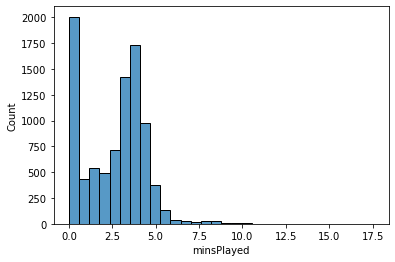

In [23]:
sns.histplot(data=df_mins, x='minsPlayed', bins=30)

In [24]:
df_mins['minsPlayed'].max()

17.540616666666665

In [25]:
df_mins[df_mins['minsPlayed'] == df_mins['minsPlayed'].max()]

,endTime,artistName,trackName,msPlayed,date,time,year,month,day,hour,minsPlayed
5222,2022-05-23 23:51:00,1 Foot In - An Asian Career Podcast,HR Speaks: Does HR read all resumes? (2 of 4),1052437,2022-05-23,23:51:00,2022,5,23,23,17.540617


The track that I have spent the most time listening to is a podcast. This explains the long run time.

In [26]:
df_mins['minsPlayed'].min()

0.0

In [27]:
df_mins[df_mins['minsPlayed'] == df_mins['minsPlayed'].min()]

,endTime,artistName,trackName,msPlayed,date,time,year,month,day,hour,minsPlayed
62,2021-10-11 04:35:00,Gary Jules,Falling Awake,0,2021-10-11,04:35:00,2021,10,11,4,0.0
472,2021-10-29 02:19:00,Ed Sheeran,Stop The Rain,0,2021-10-29,02:19:00,2021,10,29,2,0.0
704,2021-11-04 01:33:00,Hollow Coves,Patience,0,2021-11-04,01:33:00,2021,11,4,1,0.0
984,2021-12-02 03:56:00,Coldplay,Princess of China,0,2021-12-02,03:56:00,2021,12,2,3,0.0
1069,2021-12-04 08:32:00,Miley Cyrus,The Climb,0,2021-12-04,08:32:00,2021,12,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8614,2022-09-22 13:14:00,The Offspring,Nothingtown,0,2022-09-22,13:14:00,2022,9,22,13,0.0
8645,2022-09-23 00:41:00,The Piano Guys,Ghost,0,2022-09-23,00:41:00,2022,9,23,0,0.0
8814,2022-09-28 01:56:00,Coldplay,Daddy,0,2022-09-28,01:56:00,2022,9,28,1,0.0
8817,2022-09-28 01:56:00,Coldplay,See You Soon,0,2022-09-28,01:56:00,2022,9,28,1,0.0


There are 141 songs that I have probably skipped right when the playlist switches to the song.

In [28]:
df_mins[df_mins['minsPlayed'] == df_mins['minsPlayed'].min()]['trackName'].nunique()

130

Out of the 141 songs, there are only 130 unique tracks.

In [29]:
track = df_mins[df_mins['minsPlayed'] == df_mins['minsPlayed'].min()]['trackName'].value_counts().to_frame().reset_index()
track.columns = ['trackName', 'freq']
track[track['freq'] > 1]

,trackName,freq
0,Sing To Me,3
1,All Alone,2
2,Dissin the Dead,2
3,The Scientist,2
4,As Long as You Love Me,2
5,Do Ya Wanna Taste It,2
6,Save Me (feat. Lil Durk),2
7,Freefall,2
8,Real Talk,2
9,One Step Closer,2


The above are the repeated tracks.

## Unique number of artists that I have listened to

In [30]:
df['artistName'].nunique()

1338

## Unique number of songs that I have listened to

In [31]:
df['trackName'].nunique()

3209

## Top 20 most played artists

In [32]:
df.groupby('artistName').count().reset_index()[['artistName', 'msPlayed']].sort_values(by='msPlayed', ascending=False).head(20)

,artistName,msPlayed
239,Coldplay,387
424,Green Day,192
1221,Vance Joy,191
531,Jason Mraz,188
649,Linkin Park,124
1258,With Confidence,121
325,Ed Sheeran,115
989,Simple Plan,112
1080,The All-American Rejects,110
472,Hollow Coves,108


## Top 20 most played songs

In [33]:
df.groupby('trackName').count().reset_index()[['trackName', 'msPlayed']].sort_values(by='msPlayed', ascending=False).head(20)

,trackName,msPlayed
548,Collide - Acoustic Version,66
796,Everyday Life,60
1690,Move Along,53
1682,Moth To A Flame (with The Weeknd),48
2468,The Climb,46
2933,You Can't Kill My Rock 'n Roll,42
2913,Yellow,36
2151,Shape of My Heart,36
766,Enter Sandman,36
1240,I'm Yours,36


## Top 5 most played songs each month (dense rank)

In [34]:
df1 = df.groupby(['trackName','month']).count().reset_index()[['trackName', 'month', 'msPlayed']]
df1[df1['msPlayed'] > 1]

,trackName,month,msPlayed
9,"1, 2, 3, 4",1,2
10,"1, 2, 3, 4",4,2
15,100 Strangers,9,2
18,100 Years,5,2
22,100 Years,11,2
...,...,...,...
5324,聽見下雨的聲音,5,2
5328,記得,1,2
5331,說好的幸福呢,3,2
5337,開不了口,3,2


In [35]:
df1['rank'] = df1.groupby('month')['msPlayed'].rank(method='dense', ascending=False).astype(int)

In [36]:
df2 = df1[df1['rank'] < 6].sort_values(['month', 'rank'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 3594 to 626
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   trackName  122 non-null    object
 1   month      122 non-null    int64 
 2   msPlayed   122 non-null    int64 
 3   rank       122 non-null    int32 
dtypes: int32(1), int64(2), object(1)
memory usage: 4.3+ KB


In [37]:
df2['trackName'].nunique()

98

### Insight: Out of 122 data records in df2, there are only 98 unique songs recorded. This means that there are repeated songs in the top 5 songs monthly leaderboard.

## Repeated songs in the top 5 songs monthly leaderboard

These are the songs that appeared in the top 5 ranking for more than one month.

In [38]:
df3 = df2['trackName'].value_counts().reset_index()
df4 = df3[df3['trackName'] > 1]

## Using music genre finder on the internet to identify the song genre (manual method)

In [39]:
genre = ['pop', 'acoustic pop', 'alternative rock', 'acoustic pop', 'dance pop', 'rock', 'folk pop', 'pop', 'pop rock', 'rock', 'rock', 'pop punk', 'metal', 'pop', 'acoustic pop', 'edm', 'j-rock']
genre_df = pd.DataFrame({'genre':genre})
genre_df

,genre
0,pop
1,acoustic pop
2,alternative rock
3,acoustic pop
4,dance pop
5,rock
6,folk pop
7,pop
8,pop rock
9,rock


Merge genre_df with df4 to match the repeated songs with their respective genre

In [40]:
df4['genre'] = genre_df['genre']
df4

C:\Users\pclee\AppData\Local\Temp/ipykernel_11748/1237936460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['genre'] = genre_df['genre']


,index,trackName,genre
0,Everyday Life,5,pop
1,Collide - Acoustic Version,4,acoustic pop
2,You Can't Kill My Rock 'n Roll,3,alternative rock
3,I'm Yours,3,acoustic pop
4,Shape of My Heart,2,dance pop
5,Livin' On A Prayer,2,rock
6,Missing Piece,2,folk pop
7,Yellow,2,pop
8,Monsoon,2,pop rock
9,Sweet Child O' Mine,2,rock


In [41]:
df4['genre'].value_counts()

pop                 3
acoustic pop        3
rock                3
alternative rock    1
dance pop           1
folk pop            1
pop rock            1
pop punk            1
metal               1
edm                 1
j-rock              1
Name: genre, dtype: int64

### Insight: It appears that amongst the repeated songs that are ranked within top 5 monthly, most belongs to the pop genre. Alongside, rock is also a common genre.

## Repeated artists in the top 20 songs leaderboard

These are the artists whose songs are played very frequently.

In [42]:
df5 = df.groupby(['artistName', 'trackName']).count().reset_index()[['artistName', 'trackName', 'msPlayed']].sort_values(by='msPlayed', ascending=False).head(20)
df5['artistName'].value_counts()

Coldplay                    3
Jason Mraz                  2
Vance Joy                   2
Howie Day                   1
The All-American Rejects    1
Swedish House Mafia         1
Miley Cyrus                 1
Hardcore Superstar          1
Metallica                   1
Backstreet Boys             1
Simple Plan                 1
Guns N' Roses               1
Yellowcard                  1
Wig Wam                     1
BAND-MAID                   1
Nirvana                     1
Name: artistName, dtype: int64

# Part 2: Questioning

## Which months am I most active on Spotify?

In [43]:
df.groupby('month').sum()['msPlayed'].sort_values(ascending=False)

month
12    169976260
4     165815756
9     148887948
7     139105123
1     128184863
6     120408785
3     114452002
10    107451535
5     102574251
8      97680004
2      74541756
11     53158664
Name: msPlayed, dtype: int64

### Insight: Activity is particularly low in Nov 2021. This may be related to the busy period of my new job when there were lots of meetings, and I was also trying to adapt to my new job.

## Which days am I most active on Spotify?

In [44]:
df6 = df.groupby('day').sum()['msPlayed'].reset_index()
df6['rank'] = df6['msPlayed'].rank(method='dense', ascending=False).astype(int)
np.abs(df6).style.background_gradient(sns.light_palette("orange", as_cmap=True))

,day,msPlayed,rank
0,1,42762469,15
1,2,56837252,7
2,3,38399232,20
3,4,55009714,9
4,5,28625714,31
5,6,45637993,13
6,7,36514798,26
7,8,41346018,18
8,9,36433954,27
9,10,49562130,12


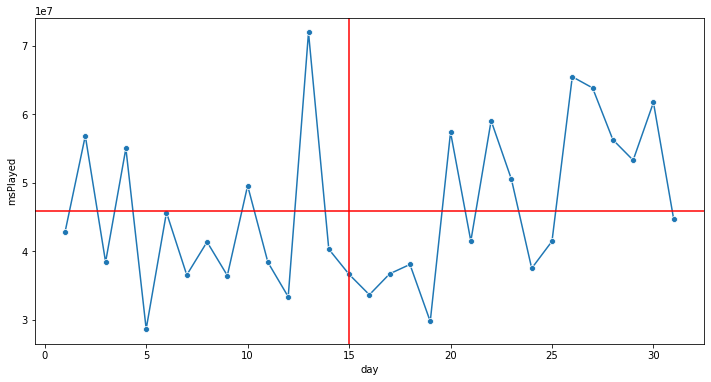

In [45]:
plt.figure(figsize=(12,6))
sns.lineplot(x='day', y='msPlayed', data=df6, marker='o')
plt.axvline(x=15, c='red')
plt.axhline(y=df6['msPlayed'].mean(), c='red')

<AxesSubplot:ylabel='msPlayed'>

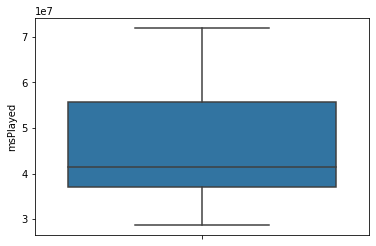

In [46]:
sns.boxplot(data=df6, y='msPlayed')

### Insights: There are more peaks in the second half of the month than first half. This suggests that I was more active on Spotify in the second half of the month. I was particularly active on Spotify on 13th than other days within the one year period. The activity time peaked on 13th but is not an outlier.

## Finding out whether all the 13th of the twelve months have equal activity time or whether one month dominates the trend (aka outlier)

In [47]:
df7 = df.groupby(['month', 'day']).sum()['msPlayed'].reset_index()
df7 = df7[df7['day'] == 13]
np.abs(df7).style.background_gradient(sns.light_palette("orange", as_cmap=True))

,month,day,msPlayed
11,1,13,10467136
37,2,13,245356
62,3,13,4287570
90,4,13,7392072
117,5,13,8540096
145,6,13,15993341
171,7,13,6179974
201,8,13,1721433
230,9,13,7173880
260,10,13,4362082


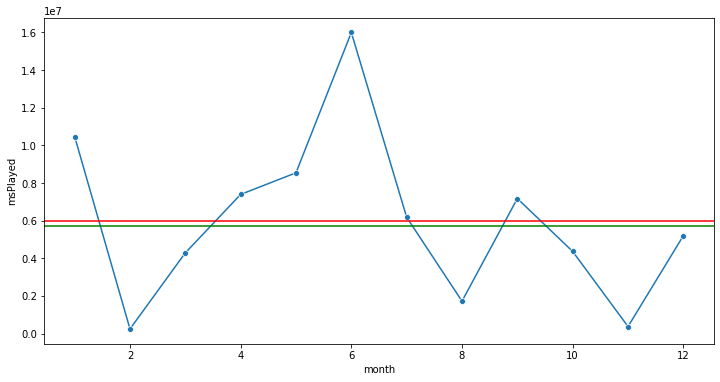

In [48]:
plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='msPlayed', data=df7, marker='o')
plt.axhline(y=df7['msPlayed'].mean(), c='red')
plt.axhline(y=df7['msPlayed'].median(), c='green')

<AxesSubplot:ylabel='msPlayed'>

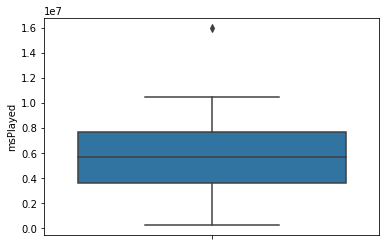

In [49]:
sns.boxplot(data=df7, y='msPlayed')

### Insight: Amongst all the 13th, June has recorded exceptionally high activity time. This peak / outlier might have contributed to the reason why 13th is the day with highest activity.

## Which hour am I most active on Spotify?

As the time recorded is in UTC format (SG is 8 hours ahead) a conversion must be performed on the data.

In [50]:
df8 = df.groupby('hour').sum()['msPlayed'].reset_index()
df8['rank'] = df8['msPlayed'].rank(method='dense', ascending=False).astype(int)
df8['hour'] = df8['hour'] + 8
np.abs(df8).style.background_gradient(sns.light_palette("orange", as_cmap=True))

,hour,msPlayed,rank
0,8,91192151,8
1,9,125544450,3
2,10,138148633,1
3,11,86553499,10
4,12,67056575,12
5,13,115567887,6
6,14,123027967,4
7,15,121519836,5
8,16,100397789,7
9,17,74993042,11


In [51]:
df8['hour'].replace(30, (30-24), inplace=True)
df8['hour'].replace(31, (31-24), inplace=True)

In [52]:
np.abs(df8).style.background_gradient(sns.light_palette("orange", as_cmap=True))

,hour,msPlayed,rank
0,8,91192151,8
1,9,125544450,3
2,10,138148633,1
3,11,86553499,10
4,12,67056575,12
5,13,115567887,6
6,14,123027967,4
7,15,121519836,5
8,16,100397789,7
9,17,74993042,11


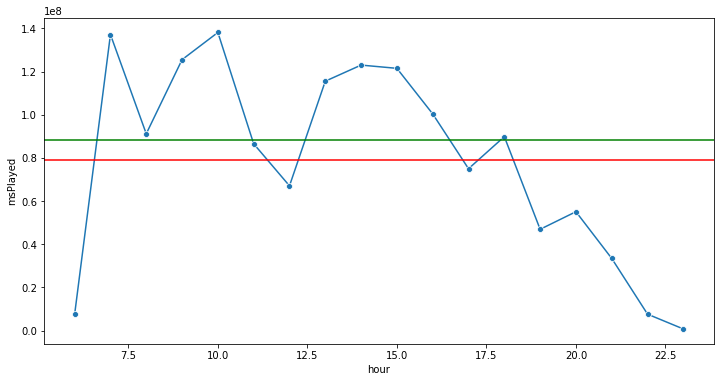

In [53]:
plt.figure(figsize=(12,6))
sns.lineplot(x='hour', y='msPlayed', data=df8, marker='o')
plt.axhline(y=df8['msPlayed'].mean(), c='red')
plt.axhline(y=df8['msPlayed'].median(), c='green')

### Insight: Activity on Spotify generally begins at the earlier half of the day. This could be during my commute to work and me listening to music during early working hours when my focus is at its the highest. This suggests that music was used as a medium for (1) entertainment and (2) to increase focus at work.

### Music is also likely used as a medium to stay awake post-lunch as suggested by the peak in activity after 12pm.

### Activity also peaked during going home hours at 6pm.

# Part 3: Data exploration using Machine Learning

## PCA - to explore changes when PCA is applied

In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

In [56]:
scaled_df = scaler.fit_transform(df.drop(['endTime', 'artistName', 'trackName', 'date', 'time'], axis=1))

In [57]:
pca_run1 = PCA(n_components=2)

In [58]:
pca_components = pca_run1.fit_transform(scaled_df)

In [59]:
pca_run1.explained_variance_ratio_

array([0.34896471, 0.20924087])

In [60]:
pca_run1.explained_variance_ratio_.sum()

0.558205585356726

In [61]:
df.drop(['endTime', 'artistName', 'trackName', 'date', 'time'], axis=1).columns

Index(['msPlayed', 'year', 'month', 'day', 'hour'], dtype='object')

The two PCA components were created using the above data points.

### Insight: By shrinking the attributes from 5 dimensions to 2 dimensions, the 2 dimensions only explain about 55% of the data's variance. This means that the attributes are similar to each other in terms of covariance as PCA creates new components based on variance. I.e., PCA will create the new components according to the order of variance. 

### The reason for the low explained variance ratio could be due to similarity between the data fields (i.e., year, month, day, hour). These fields are all time-related, therefore, the amount of variance between them are low.

## DBSCAN - to explore potential clusters in the data set

In [62]:
from sklearn.cluster import DBSCAN

In [63]:
dbscan = DBSCAN(eps=0.8)

### Insight: I have tried using eps = 0.5 and eps = 1, the former clustered all the points as one class while the latter clustered all the points similar to eps = 0.8. I decided to keep the number in the middle.

In [64]:
df6_scaled = scaler.fit_transform(df6)

In [65]:
dbscan.fit(df6_scaled)

DBSCAN(eps=0.8)

In [66]:
y_pred = dbscan.fit_predict(df6_scaled)

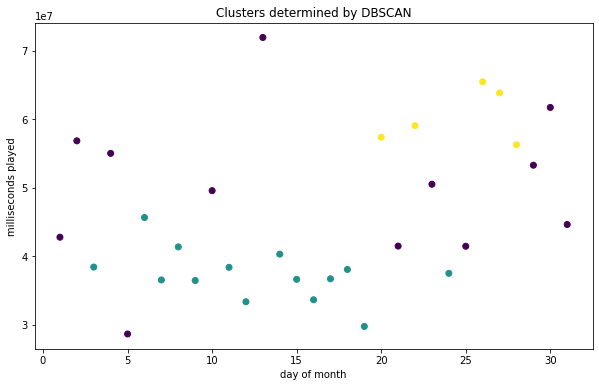

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(df6['day'], df6['msPlayed'], c=y_pred)
plt.title("Clusters determined by DBSCAN")
plt.xlabel('day of month')
plt.ylabel('milliseconds played');

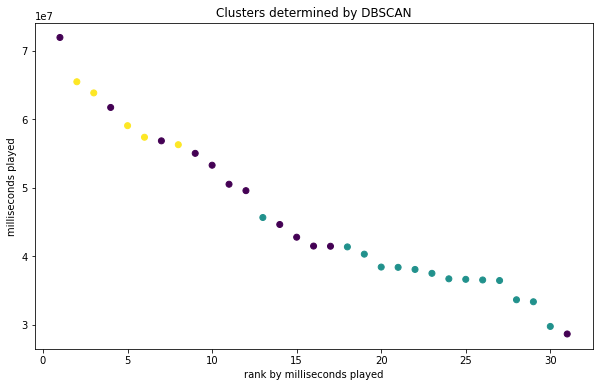

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(df6['rank'], df6['msPlayed'], c=y_pred)
plt.title("Clusters determined by DBSCAN")
plt.xlabel('rank by milliseconds played')
plt.ylabel('milliseconds played');

### Insight: From the viz, we can infer that the teal and yellow group are clustered based on their rank as the data points are clustered closely together when we plot the data points by rank. Similar trend is also observed for the day of month when the data points are plotted based on that.

### The purple data points could be data points that are outliers and/or have no clear distinct grouping as it consists of points that lie on the extreme end and those that are randomly spreaded.

# Part 4: Summary

### In this exercise, I have explored a data set that contains info about my activity on Spotify. The most popular genres are pop and rock. The least active month for me was in Nov '21 due to meetings and work matters. Amongst all the days in a month, I tend to be more active in the second half of the month, particularly 13th due to an outlier. I was also more active while commuting to-and-fro work and during post-lunch hours at work. These data can potentially be clustered into three classes by time of activity and activity duration.

### Limitations of this exercise include the inability to match all the songs by its respective genre unless through manual intervention or RPA to avoid resource wastage. By having the data on song genre, I could have found out the (1) most popular genres amongst the entire data set, (2) most produced genre by artist, (3) activity time spent by genre, (4) possible clusters by genre etc.